In [ ]:
# 📦 Step 1: Install Required Package
!pip install pytorch-tabular

In [5]:
# 🧠 Step 2: Import Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from pytorch_tabular import TabularModel
from pytorch_tabular.models.tabnet import TabNetModelConfig
from pytorch_tabular.config import DataConfig, TrainerConfig, OptimizerConfig

In [7]:
# 📁 Step 3: Load & Preprocess Dataset
df = pd.read_csv("/content/drive/MyDrive/Lydia/SC2/dataset/Extended_Employee_Performance_and_Productivity_Data.csv")
df = df.drop(columns=["Employee_ID", "Hire_Date"])
df = df.rename(columns={"Performance_Score": "PerformanceScore"})

categorical_cols = ['Department', 'Gender', 'Job_Title', 'Education_Level']
continuous_cols = [col for col in df.columns if col not in categorical_cols + ["PerformanceScore", "Resigned"]]

train, test = train_test_split(df, test_size=0.2, random_state=42)

In [8]:
# 📋 Step 4: Data Configuration
data_config = DataConfig(
    target=["PerformanceScore"],
    continuous_cols=continuous_cols,
    categorical_cols=categorical_cols
)

In [9]:
# ⚙️ Step 5: TabNet Model Configuration
model_config = TabNetModelConfig(
    task="regression",
    metrics=["mean_squared_error", "r2_score"],
    learning_rate=1e-3,
    n_d=8,
    n_a=8,
    n_steps=3,
    gamma=1.3,
    n_independent=2,
    n_shared=2,
    virtual_batch_size=128,
    mask_type="entmax",  # or 'sparsemax'
    head="LinearHead"
)

In [11]:
# 🛠 Step 6: Trainer Configuration
trainer_config = TrainerConfig(
    auto_lr_find=True,
    batch_size=512,
    max_epochs= 10,
    accelerator="auto",
    devices=1,
    load_best=False
)


optimizer_config = OptimizerConfig()

In [12]:
# 🚀 Step 7: Initialize and Train TabNet
tabular_model = TabularModel(
    data_config=data_config,
    model_config=model_config,
    optimizer_config=optimizer_config,
    trainer_config=trainer_config
)
tabular_model.fit(train=train, validation=test)

INFO:pytorch_tabular.tabular_model:Experiment Tracking is turned off
INFO:lightning_fabric.utilities.seed:Seed set to 42
INFO:pytorch_tabular.tabular_model:Preparing the DataLoaders
INFO:pytorch_tabular.tabular_datamodule:Setting up the datamodule for regression task
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71:

Finding best initial lr:   0%|          | 0/100 [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_steps=100` reached.
INFO:pytorch_lightning.tuner.lr_finder:Learning rate set to 0.017378008287493765
INFO:pytorch_lightning.utilities.rank_zero:Restoring states from the checkpoint path at /content/.lr_find_52dd06d3-ed22-4482-9a4b-c5f55765166e.ckpt
INFO:pytorch_lightning.utilities.rank_zero:Restored all states from the checkpoint at /content/.lr_find_52dd06d3-ed22-4482-9a4b-c5f55765166e.ckpt
INFO:pytorch_tabular.tabular_model:Suggested LR: 0.017378008287493765. For plot and detailed analysis, use `find_learning_rate` method.
INFO:pytorch_tabular.tabular_model:Training Started


┏━━━┳━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━┓
┃   ┃ Name             ┃ Type           ┃ Params ┃ Mode  ┃
┡━━━╇━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━┩
│ 0 │ _embedding_layer │ Identity       │      0 │ train │
│ 1 │ _backbone        │ TabNetBackbone │  7.2 K │ train │
│ 2 │ _head            │ Identity       │      0 │ train │
│ 3 │ loss             │ MSELoss        │      0 │ train │
└───┴──────────────────┴────────────────┴────────┴───────┘

Trainable params: 7.2 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 7.2 K                                                                                                
Total estimated model params size (MB): 0                                                                          
Modules in train mode: 112                                                                                         
Modules in eval mode: 0

Output()

INFO:pytorch_tabular.tabular_model:Training the model completed


In [14]:
 #📊 Step 8: Evaluation
results = tabular_model.evaluate(test)
print("📈 Evaluation Results:", results)

preds = tabular_model.predict(test)
print(preds.head())

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │   0.006028266623616219    │
│  test_mean_squared_error  │   0.006028266623616219    │
│       test_r2_score       │    0.9969838857650757     │
└───────────────────────────┴───────────────────────────┘

📈 Evaluation Results: [{'test_loss': 0.006028266623616219, 'test_mean_squared_error': 0.006028266623616219, 'test_r2_score': 0.9969838857650757}]


/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_encoded[col].fillna(self._imputed, inplace=True)
/usr/local/lib/python3.11/dist-packages/pytorch_tabular/categorical_encoders.py:71: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting value

       PerformanceScore_prediction
75721                     2.018640
80184                     3.898014
19864                     2.975171
76699                     1.072732
92991                     4.047979


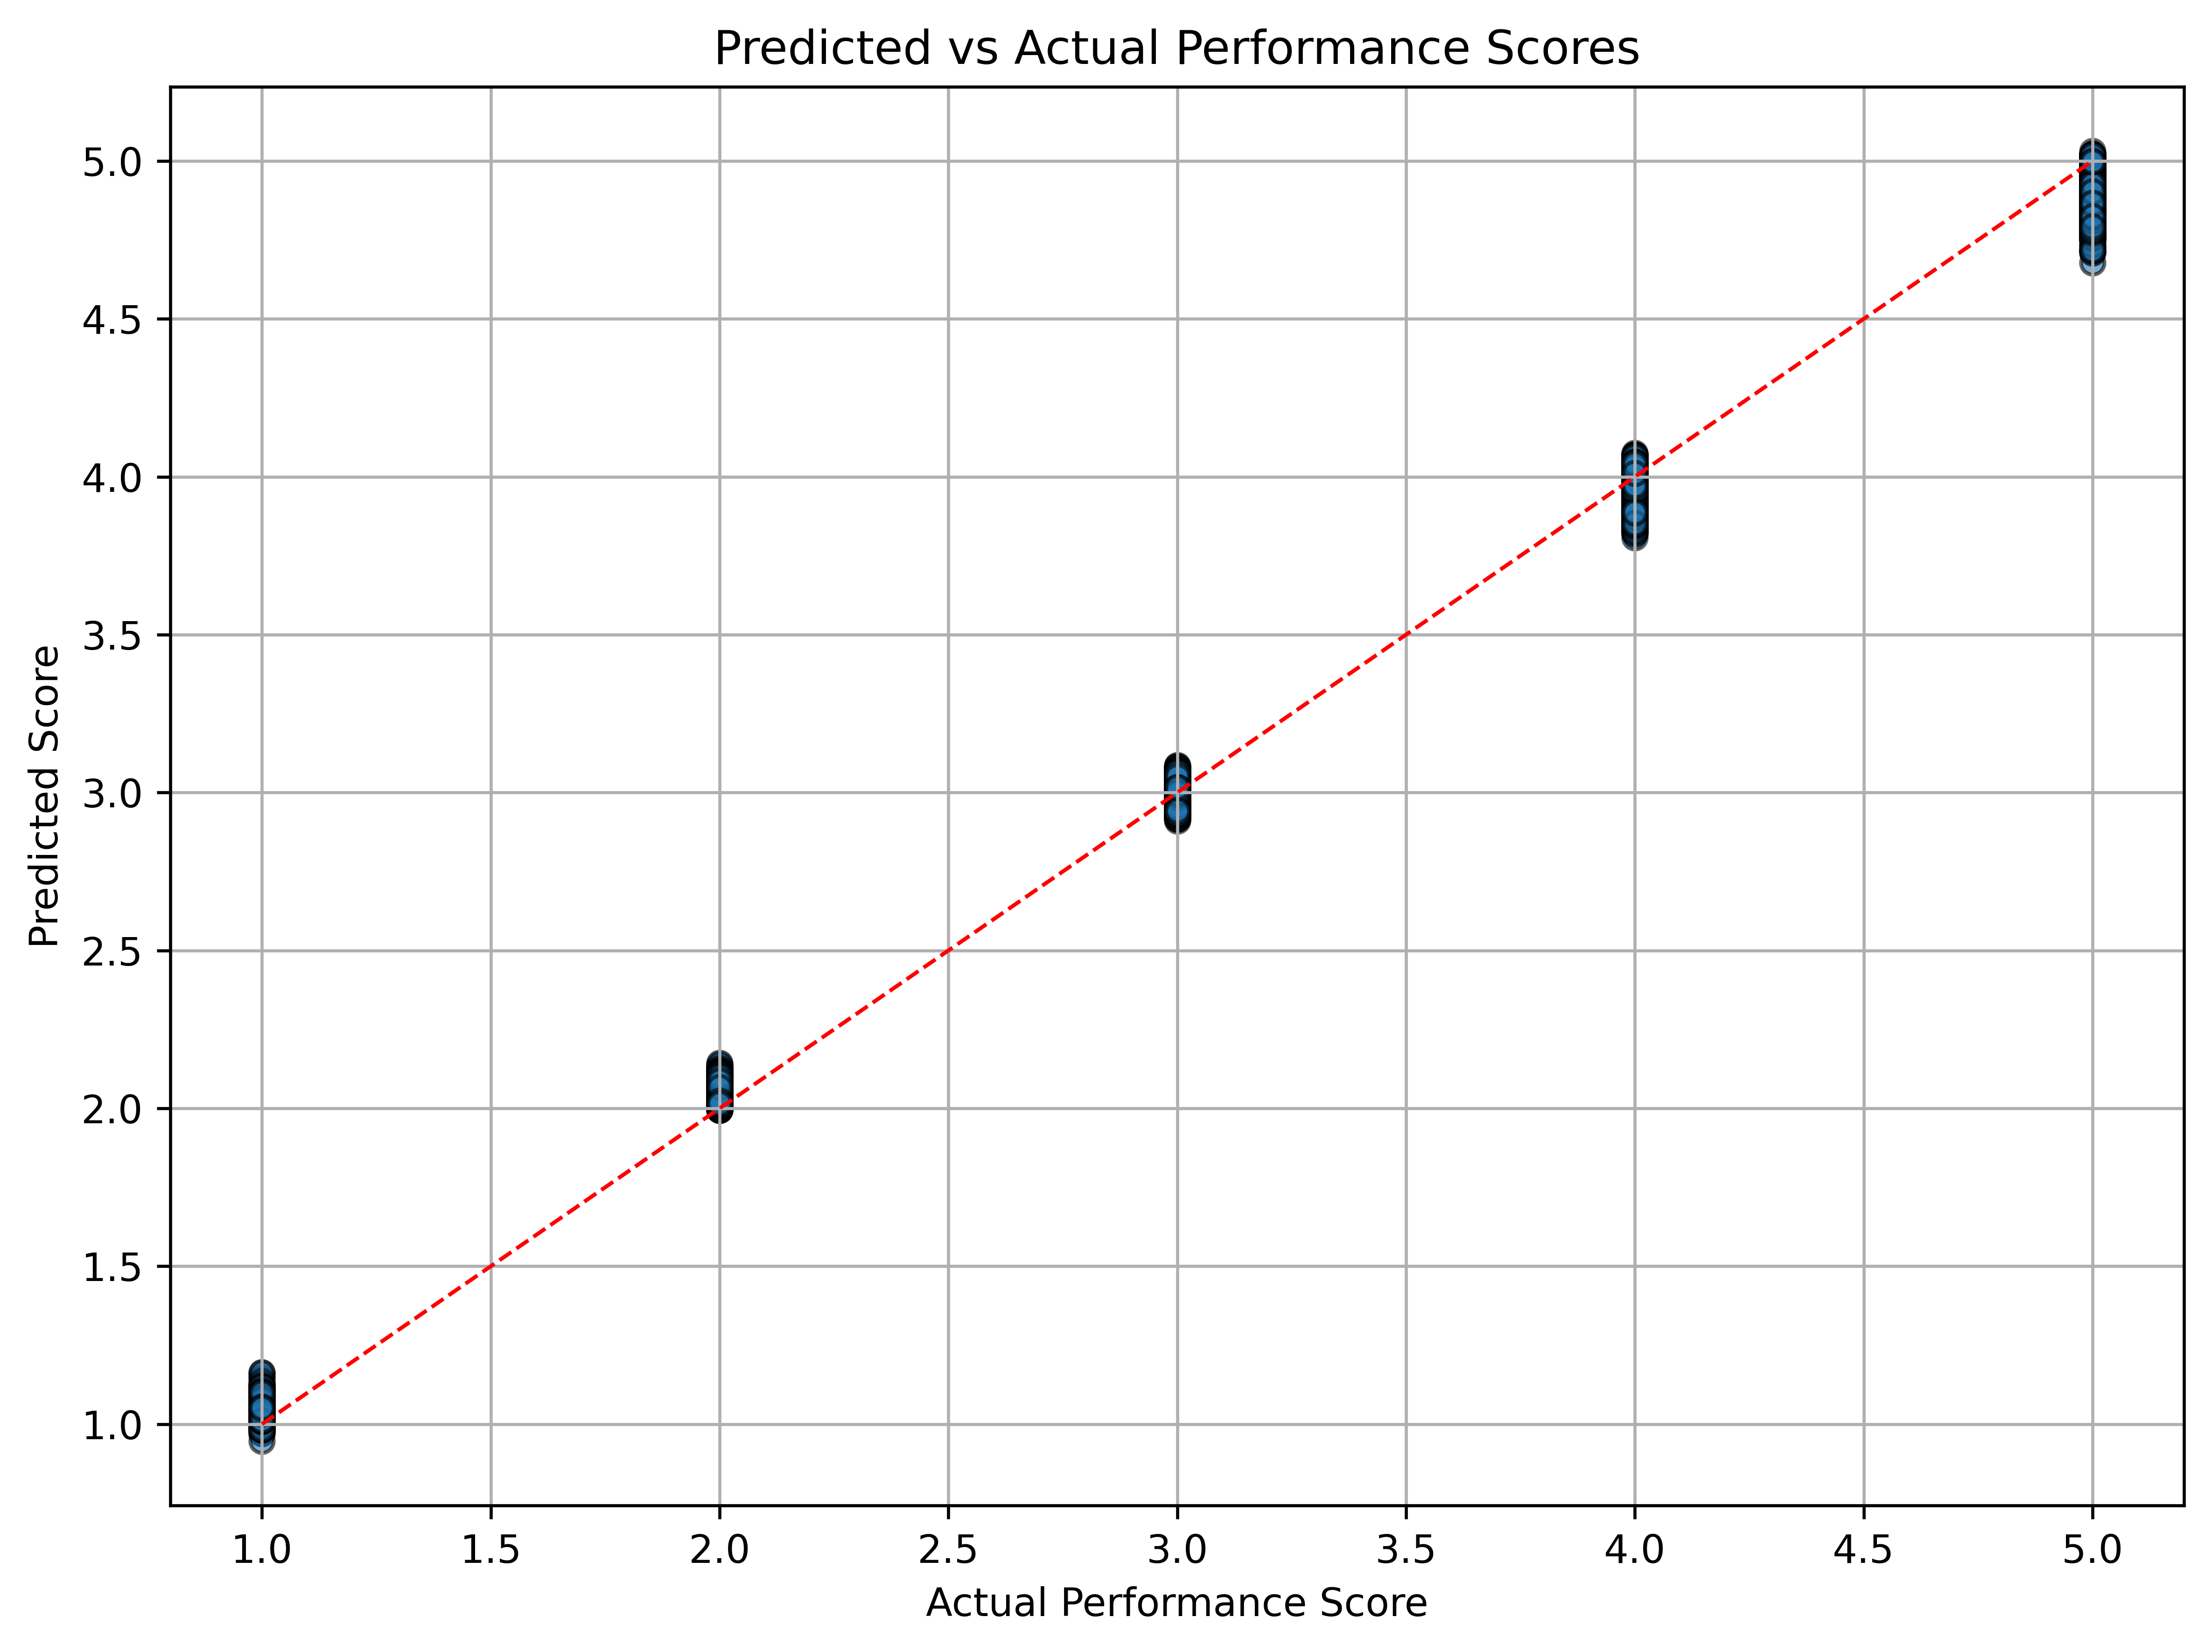

In [15]:
# 📉 Step 9: Regression Plots & Metrics
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import *

actual = test["PerformanceScore"].values
predicted = preds["PerformanceScore_prediction"].values

plt.figure(figsize=(8, 6), dpi=600)
plt.scatter(actual, predicted, alpha=0.6, edgecolors='k')
plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], 'r--', linewidth=1)
plt.xlabel("Actual Performance Score")
plt.ylabel("Predicted Score")
plt.title("Predicted vs Actual Performance Scores")
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
# Extra Metrics
mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
r2 = r2_score(actual, predicted)
msle = mean_squared_log_error(actual, predicted)
mape = mean_absolute_percentage_error(actual, predicted)

print("\n🔍 Additional Regression Metrics:")
print(f"📏 MAE: {mae:.4f}")
print(f"📉 RMSE: {rmse:.4f}")
print(f"📈 R² Score: {r2:.4f}")
print(f"🧮 MSLE: {msle:.4f}")
print(f"📊 MAPE: {mape:.2%}")


🔍 Additional Regression Metrics:
📏 MAE: 0.0619
📉 RMSE: 0.0776
📈 R² Score: 0.9970
🧮 MSLE: 0.0004
📊 MAPE: 2.46%


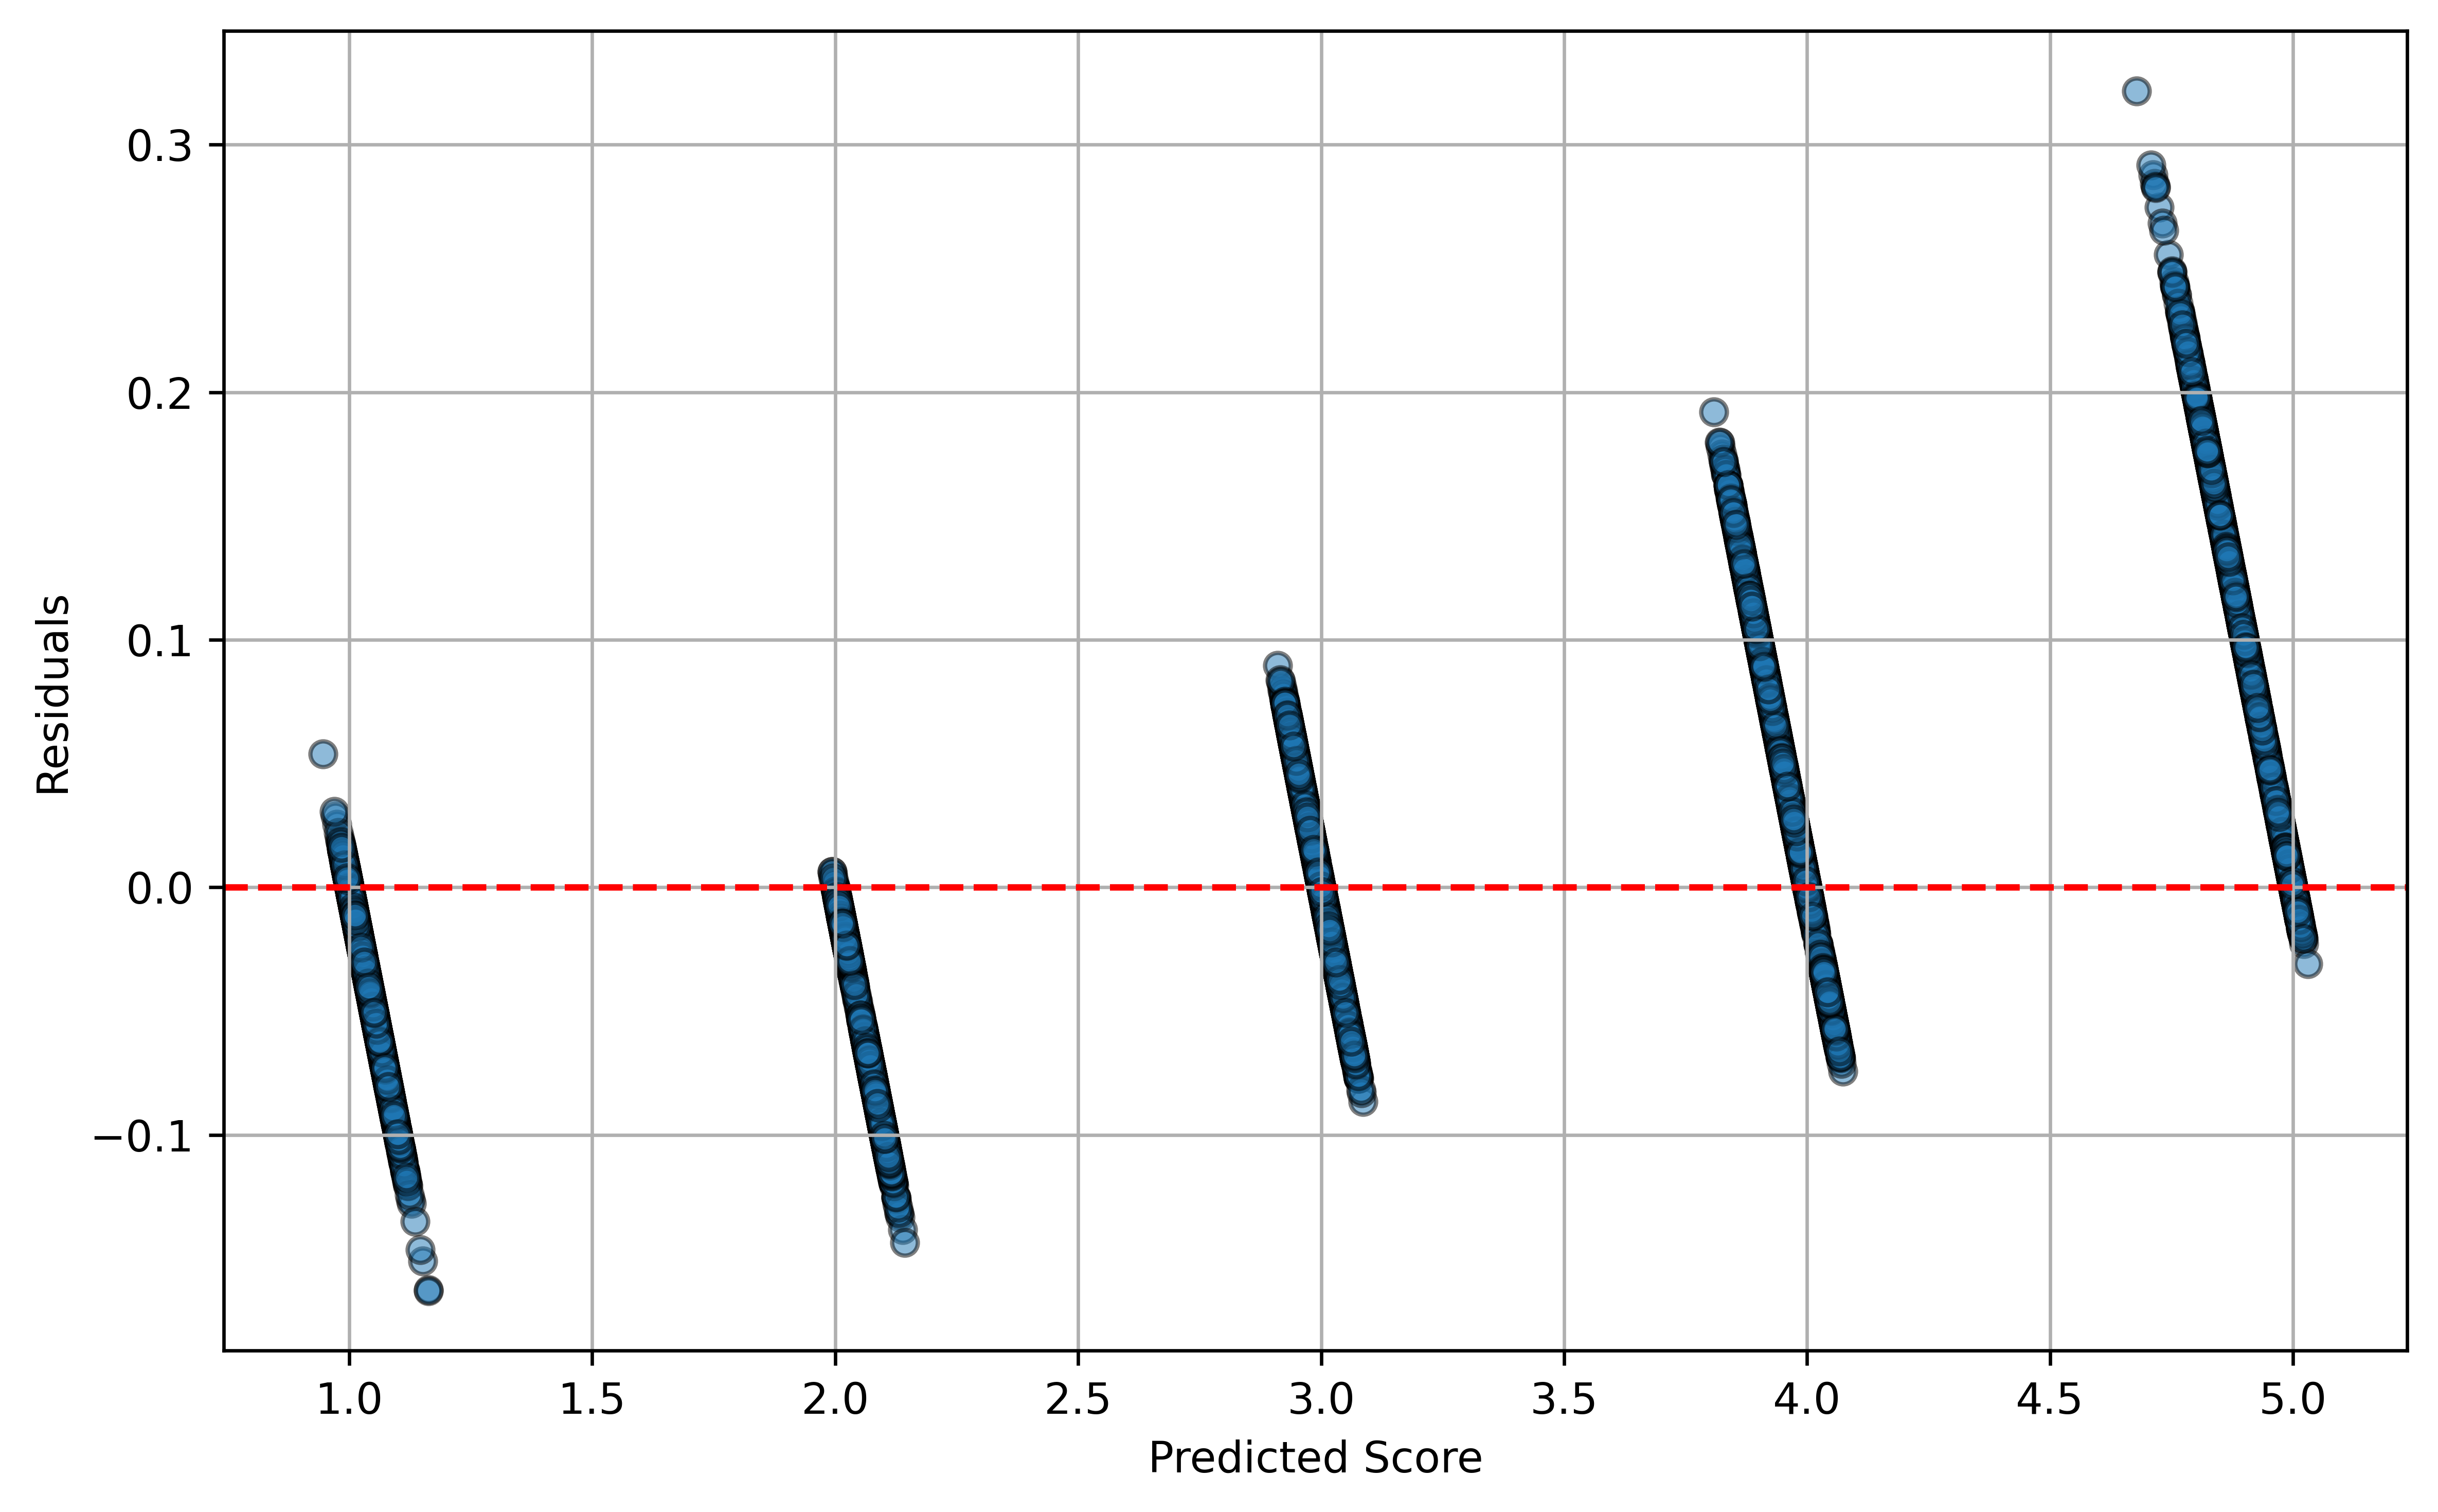

In [17]:
# Residual Analysis
residuals = actual - predicted

plt.figure(figsize=(8, 5), dpi=600)
plt.scatter(predicted, residuals, alpha=0.5, edgecolors='k')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Score")
plt.ylabel("Residuals")
plt.grid(True)
plt.tight_layout()
plt.show()

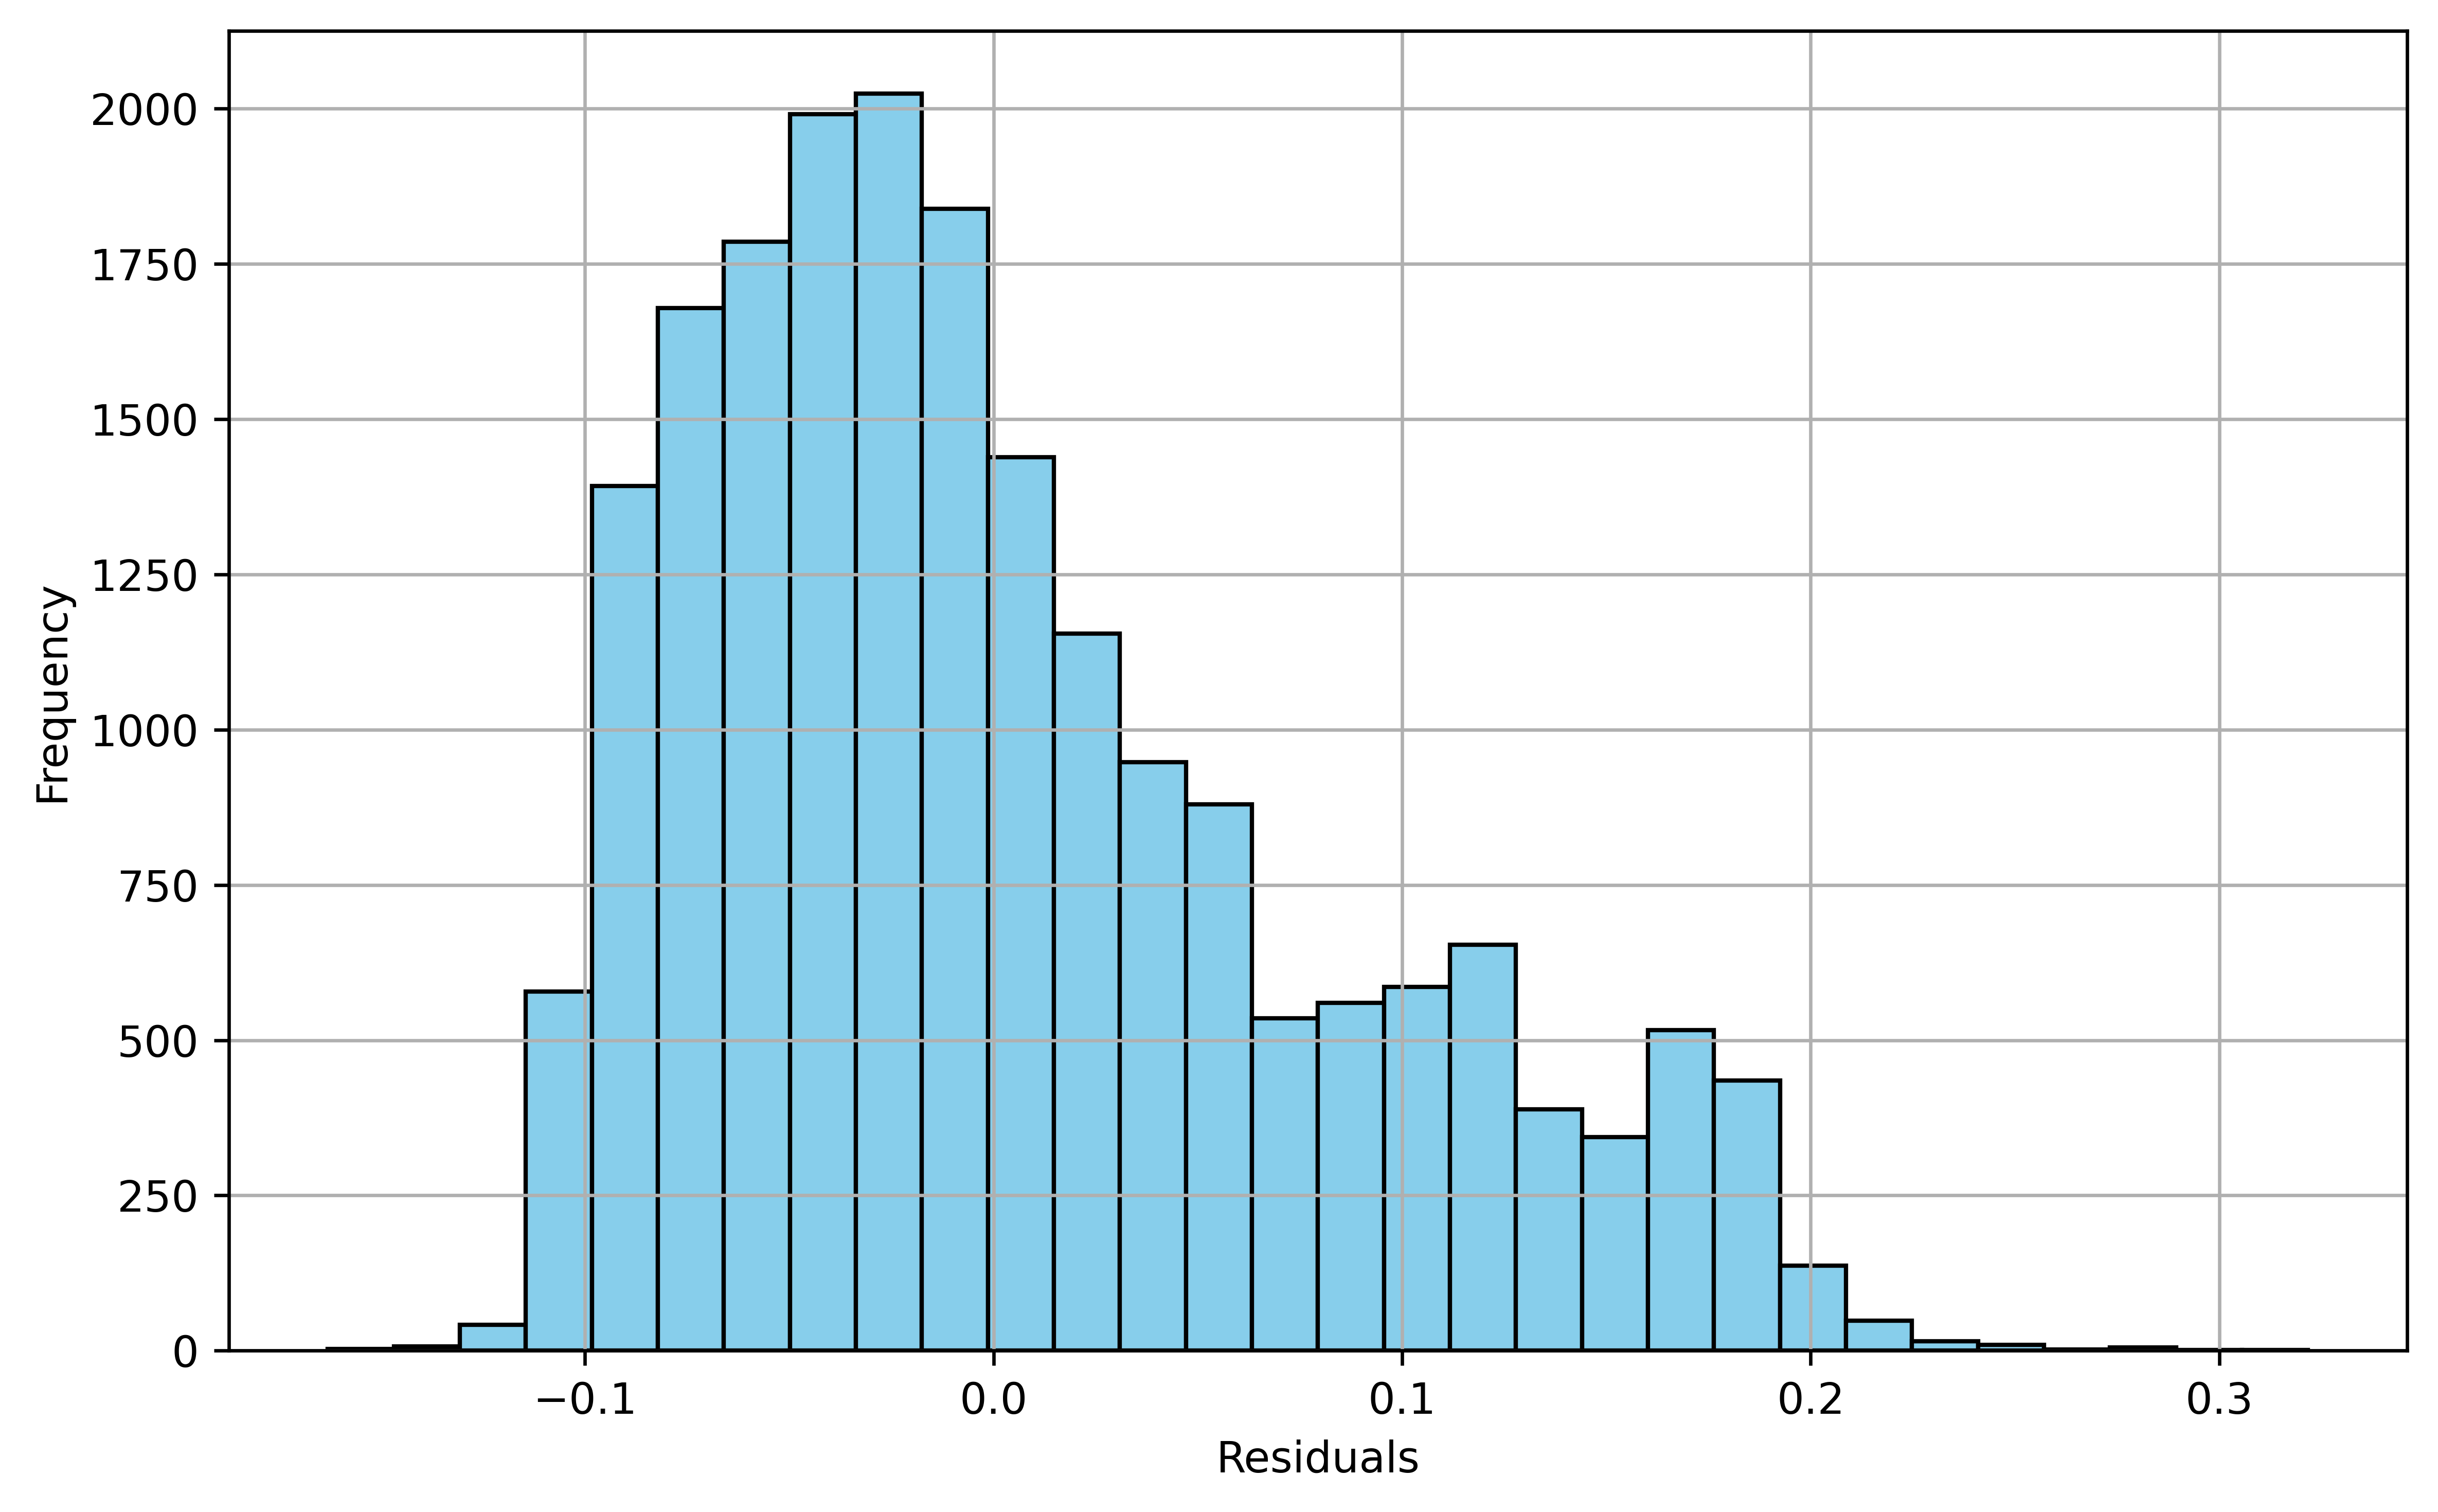

In [18]:
plt.figure(figsize=(8, 5), dpi=600)
plt.hist(residuals, bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()

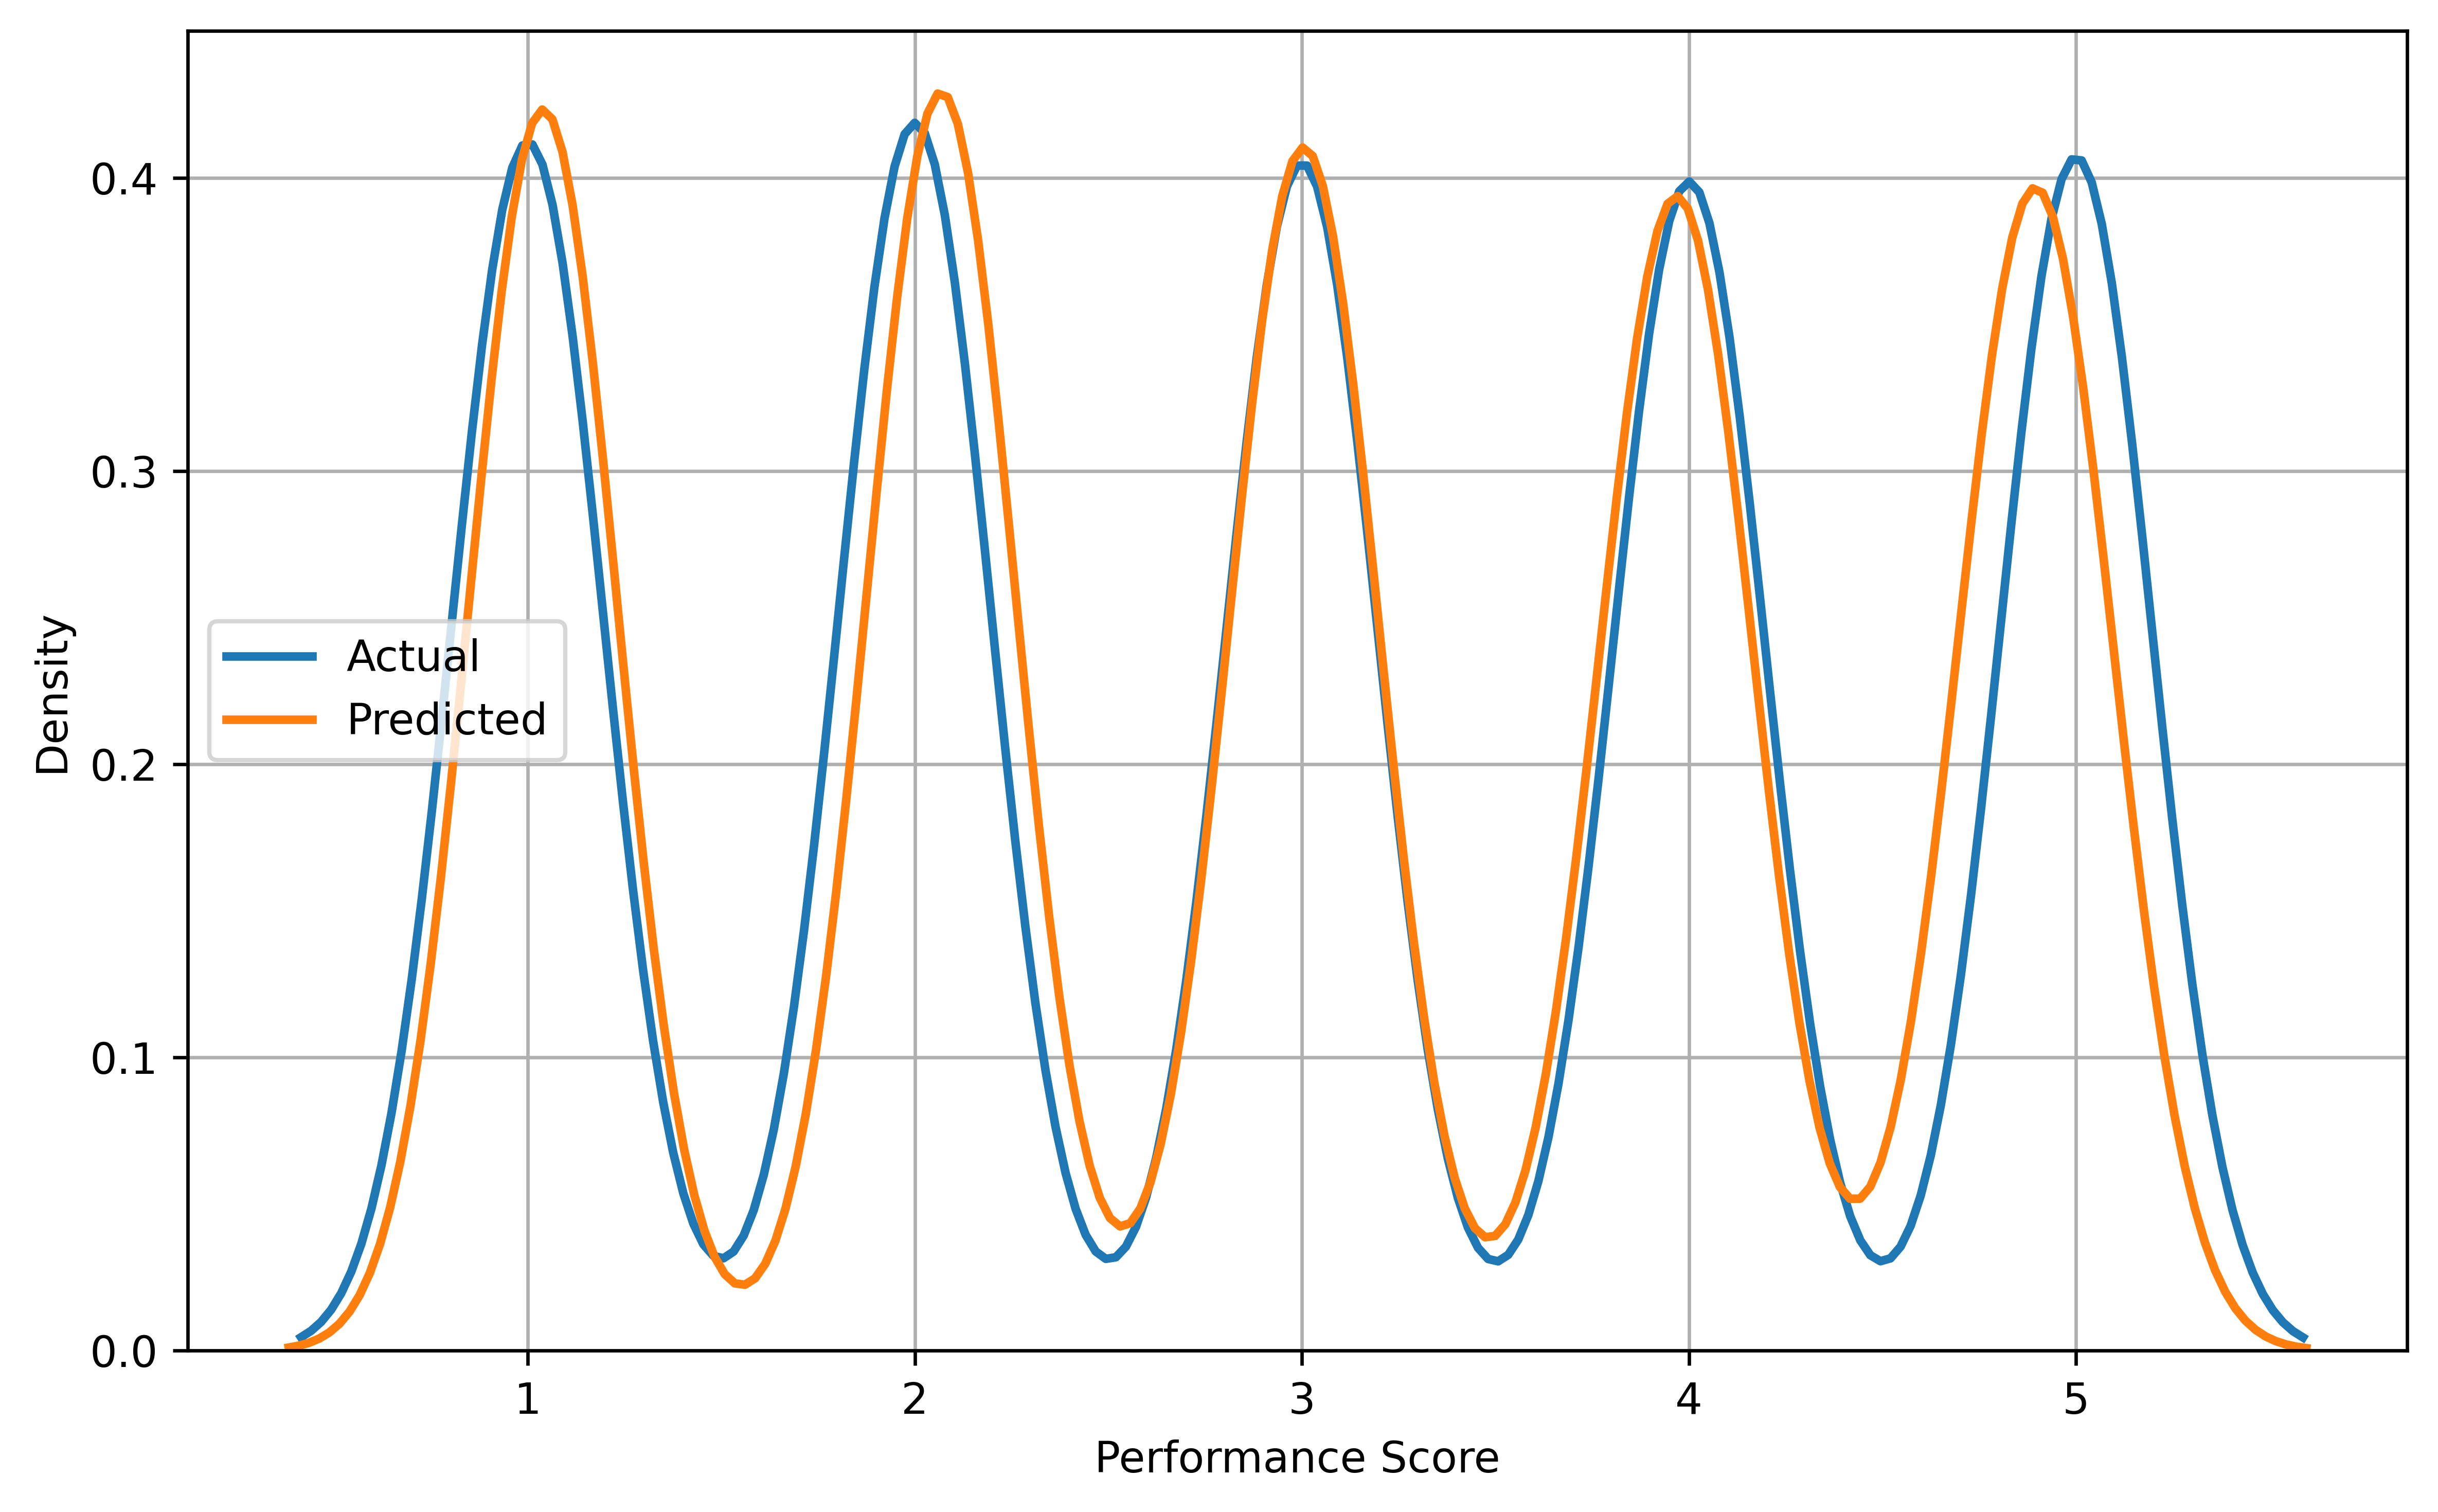

In [19]:
import seaborn as sns
plt.figure(figsize=(8, 5), dpi=600)
sns.kdeplot(actual, label="Actual", linewidth=2)
sns.kdeplot(predicted, label="Predicted", linewidth=2)
plt.xlabel("Performance Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

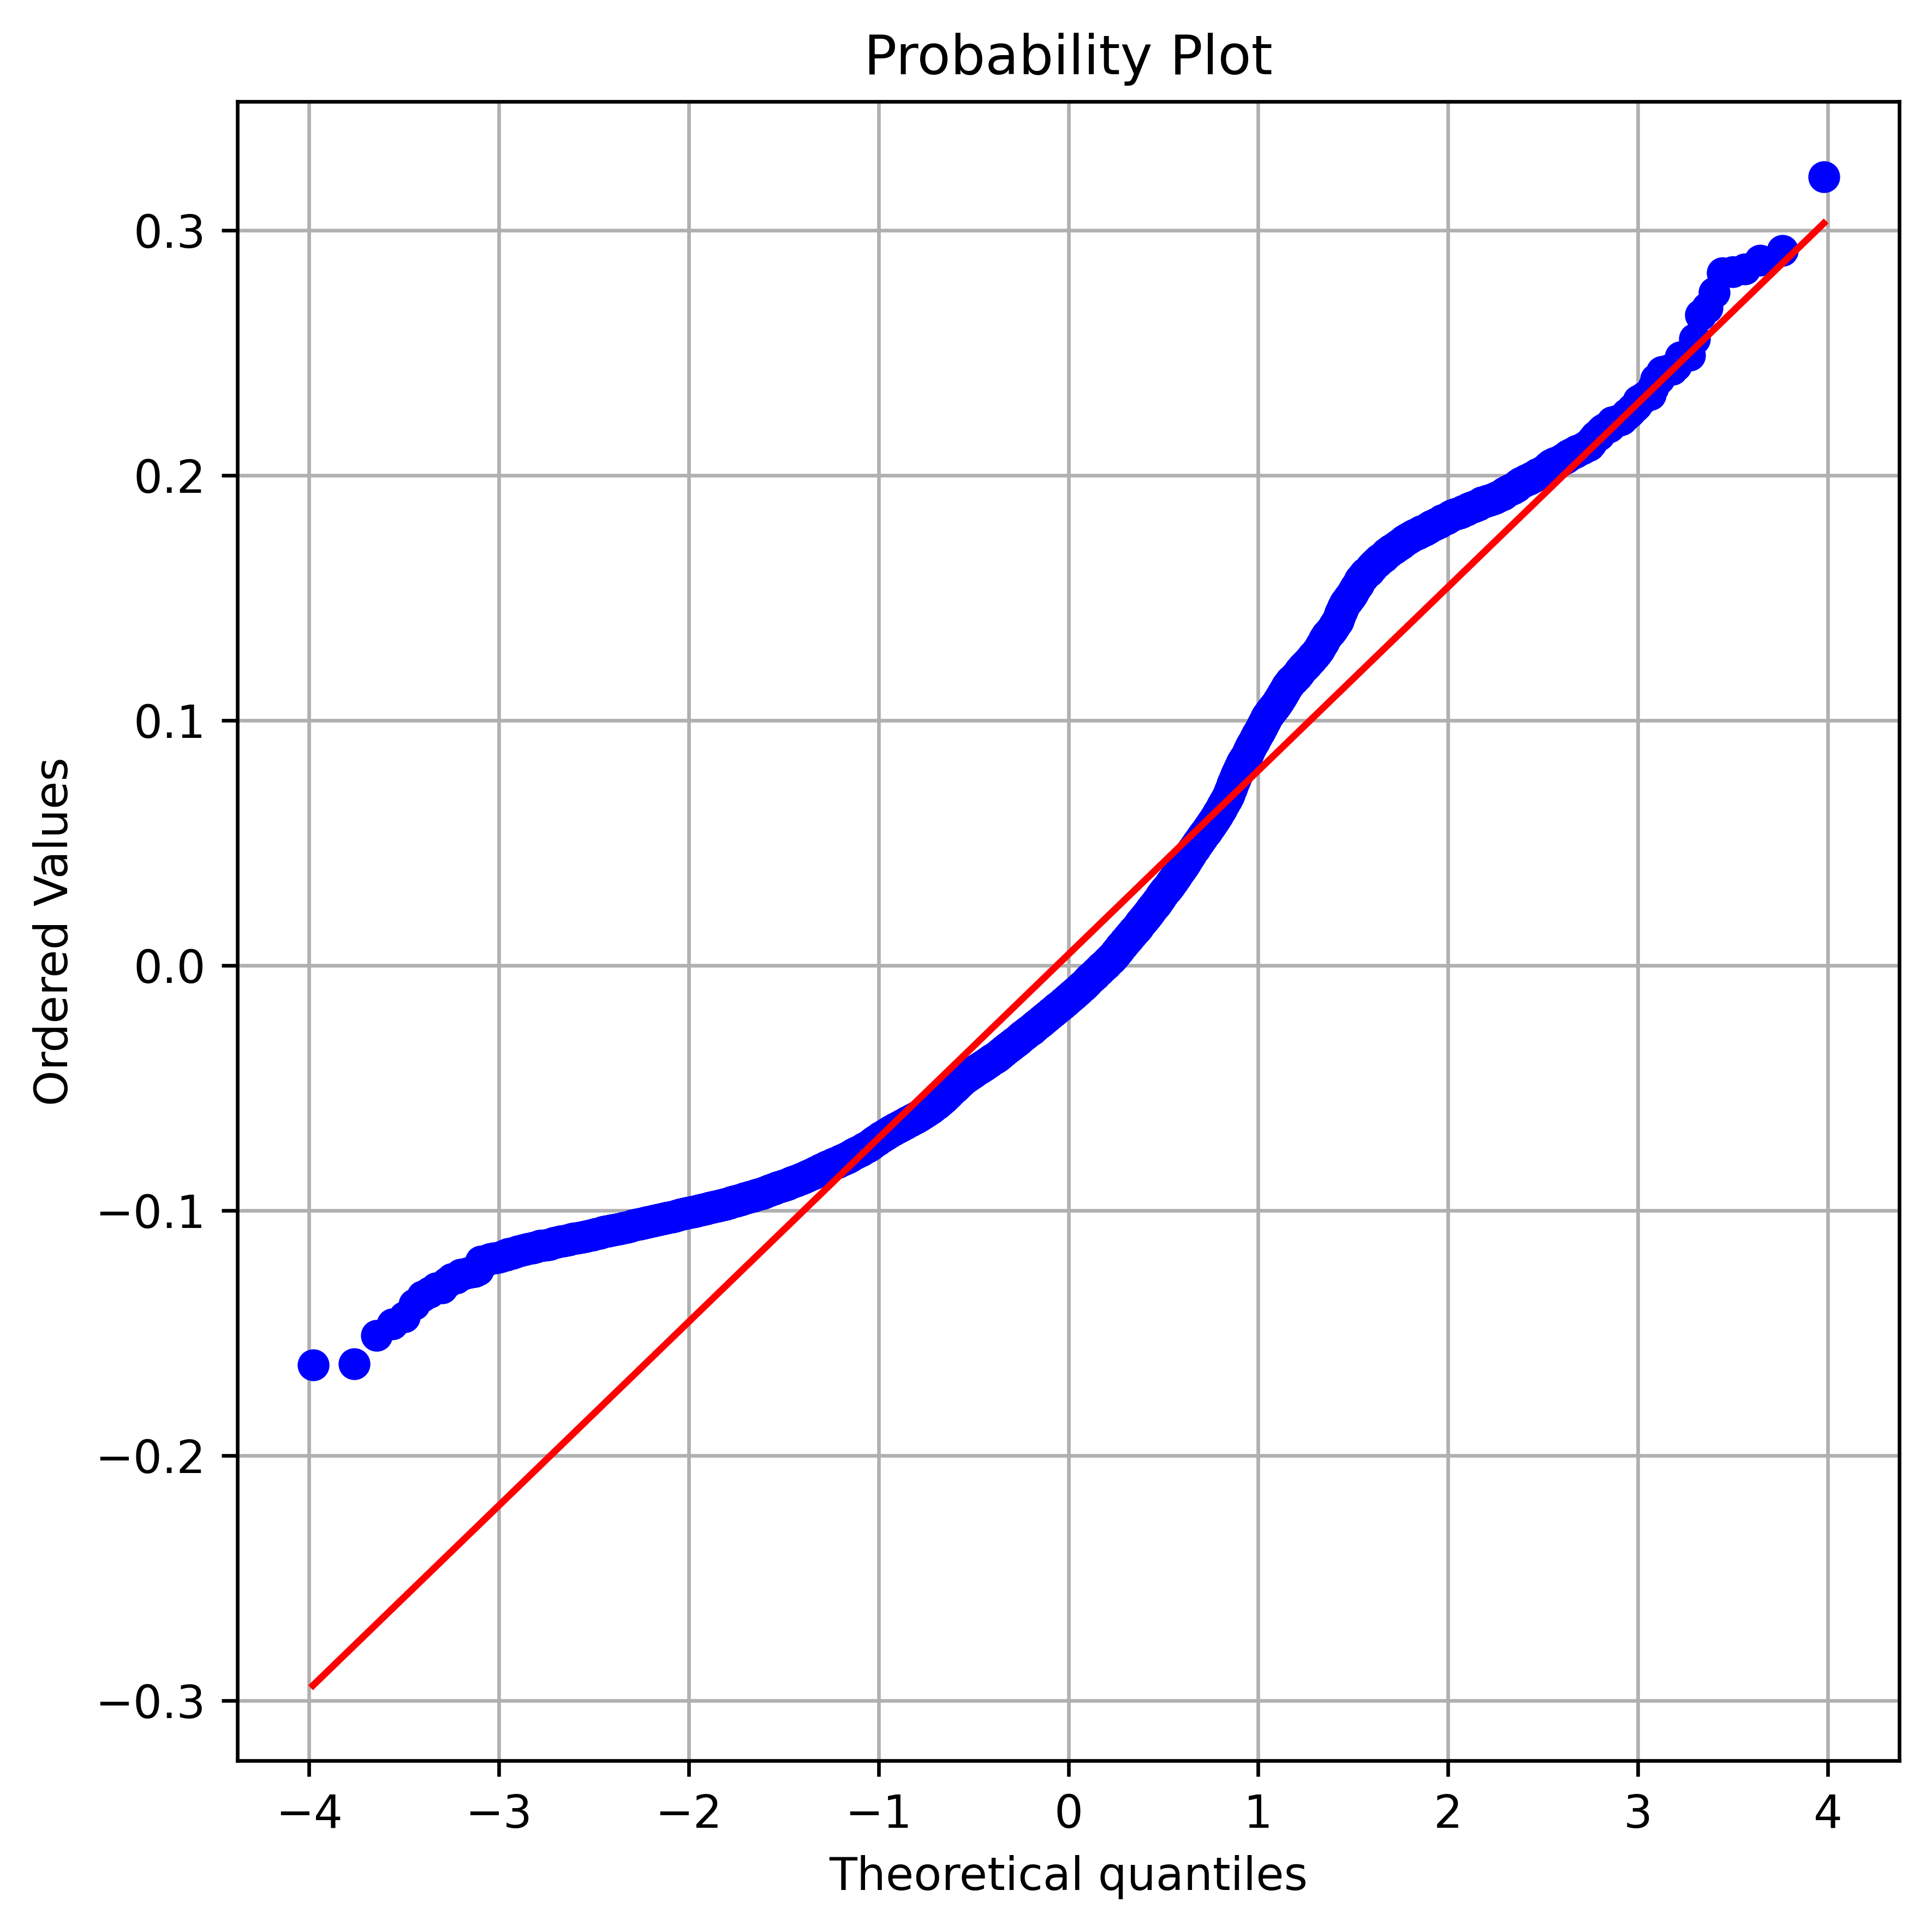

In [20]:
import scipy.stats as stats
plt.figure(figsize=(6, 6), dpi=600)
stats.probplot(residuals, dist="norm", plot=plt)
plt.grid(True)
plt.tight_layout()
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]

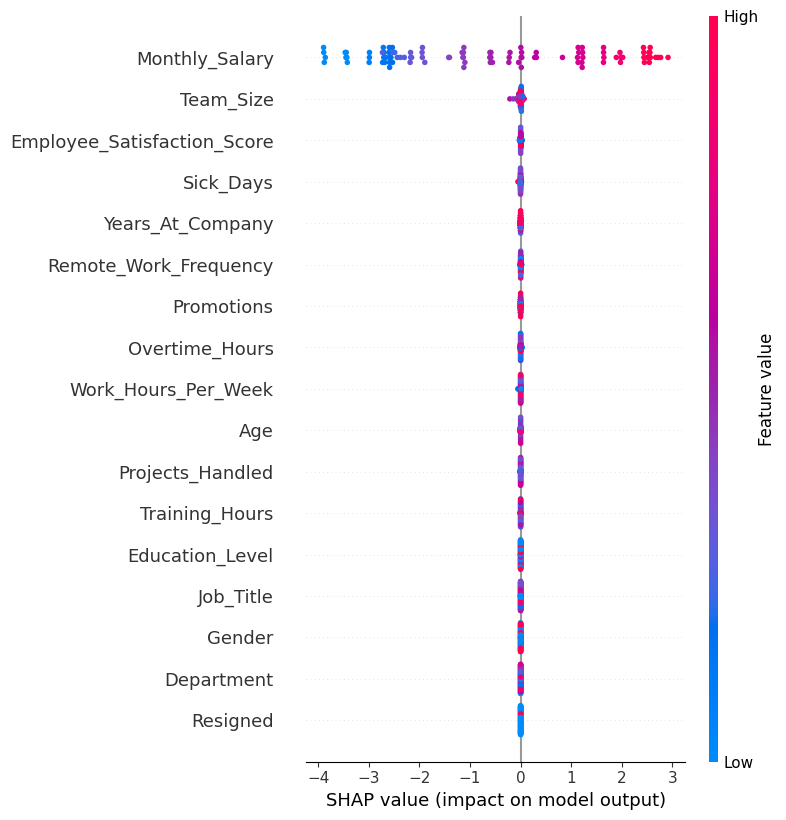

In [29]:
# 🔍 SHAP Analysis
import shap
from sklearn.preprocessing import LabelEncoder

X_test_input = test.drop(columns=["PerformanceScore"]).copy()
X_test_encoded = X_test_input.copy()

for col in categorical_cols:
    le = LabelEncoder()
    X_test_encoded[col] = le.fit_transform(X_test_encoded[col])

X_sample = X_test_encoded.sample(100, random_state=42)

def model_predict(data_array):
    df = pd.DataFrame(data_array, columns=X_sample.columns)
    preds = tabular_model.predict(df)
    return preds["PerformanceScore_prediction"].values

background = X_sample.sample(10, random_state=42).values
explainer = shap.KernelExplainer(model_predict, background)
shap_values = explainer.shap_values(X_sample.values)

shap.summary_plot(shap_values, X_sample, plot_type="bar", show=False)
plt.tight_layout()
plt.savefig("shap_tabnet_bar.png", dpi=600)
plt.close()

shap.summary_plot(shap_values, X_sample, plot_type="dot", show=False)
plt.tight_layout()
plt.savefig("shap_tabnet_beeswarm.png", dpi=300)
plt.show()

In [22]:
# 💡 SHAP Importance Table
shap_avg_importance = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame({
    "Feature": X_sample.columns,
    "Mean |SHAP Value|": shap_avg_importance
}).sort_values("Mean |SHAP Value|", ascending=False)

print(importance_df.head(10))

                        Feature  Mean |SHAP Value|
6                Monthly_Salary           1.897211
12                    Team_Size           0.022428
15  Employee_Satisfaction_Score           0.005242
10                    Sick_Days           0.003494
4              Years_At_Company           0.002613
11        Remote_Work_Frequency           0.002570
14                   Promotions           0.002437
9                Overtime_Hours           0.002160
2                           Age           0.001810
7           Work_Hours_Per_Week           0.001792


In [ ]:
!pip install lime

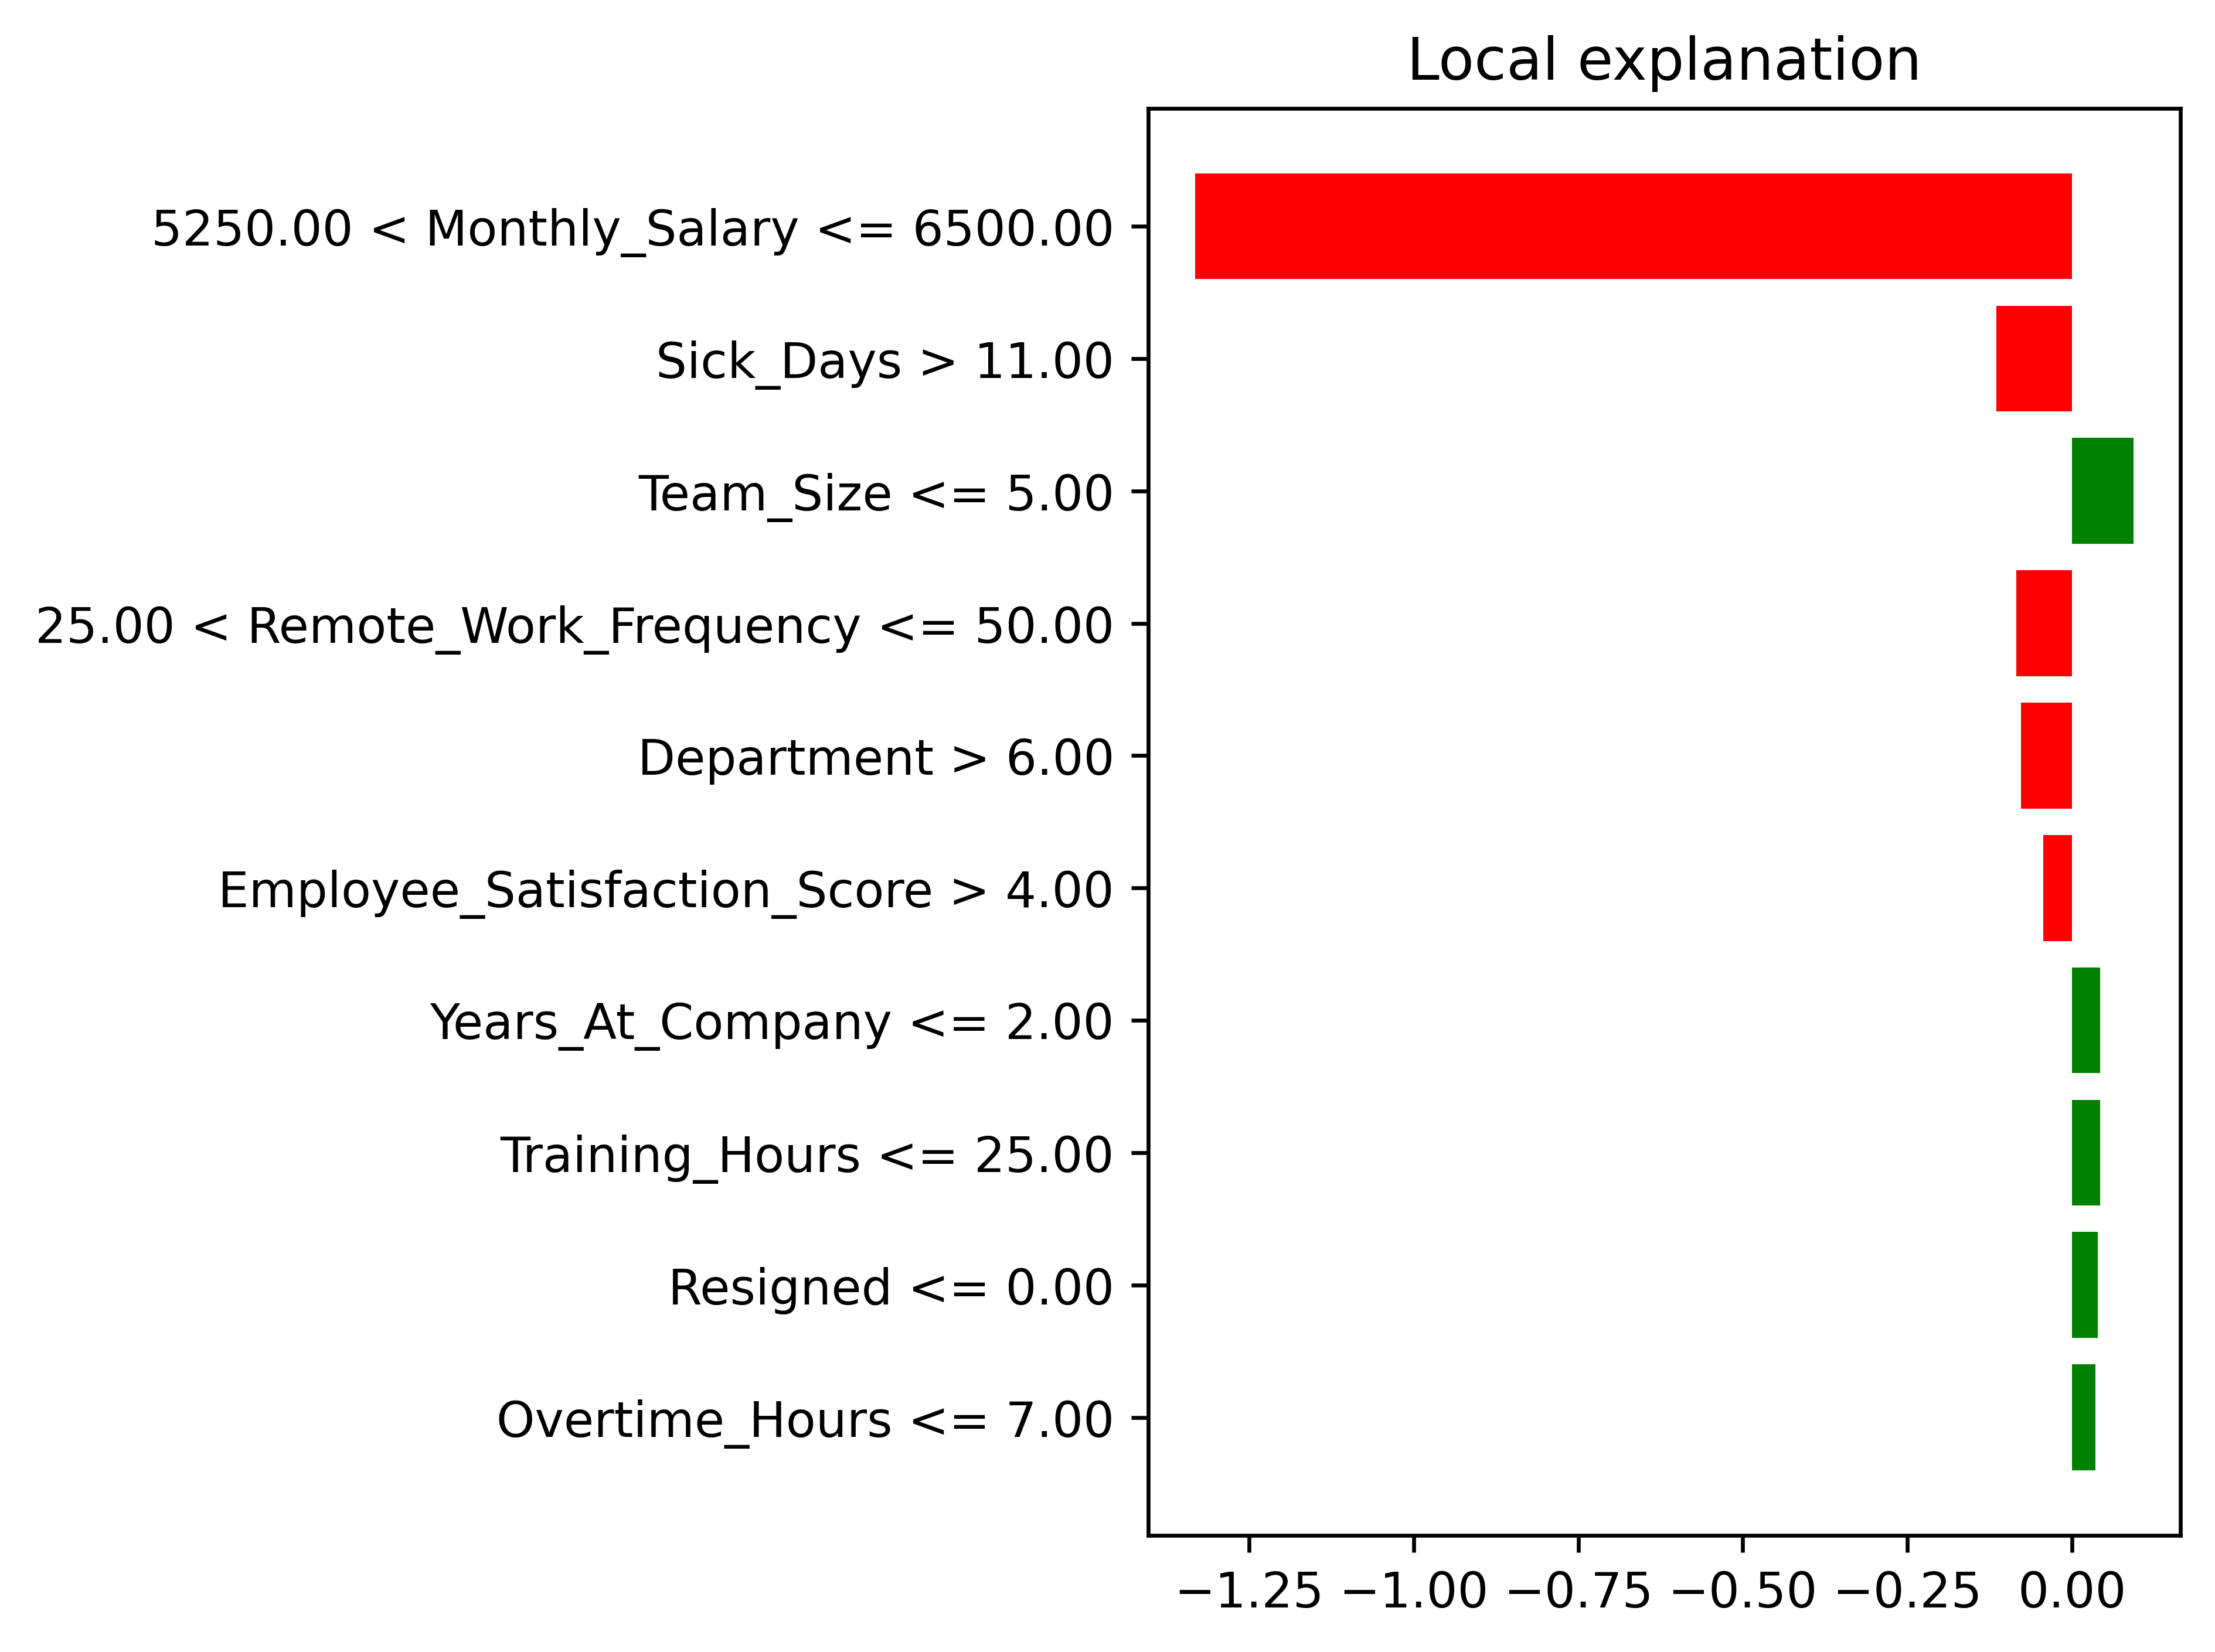

In [28]:
import lime
import lime.lime_tabular

# 🧠 LIME Explanation
from lime.lime_tabular import LimeTabularExplainer

X_train = train.drop(columns=["PerformanceScore"]).copy()
X_test = test.drop(columns=["PerformanceScore"]).copy()

for col in categorical_cols:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])

lime_explainer = LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns.tolist(),
    mode="regression"
)

sample_index = 5
lime_exp = lime_explainer.explain_instance(
    data_row=X_test.iloc[sample_index].values,
    predict_fn=model_predict,
    num_features=10
)

fig = lime_exp.as_pyplot_figure()
fig.set_dpi(600)
plt.tight_layout()
plt.savefig("lime_tabnet_sample5.png")
plt.show()